In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
import warnings
warnings.filterwarnings('ignore')
sns.set_style('dark')

In [5]:
df = pd.read_csv('housepricesbigsample.csv') 
df

,Area,Bedrooms,Age,Price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [6]:
df['Bedrooms'][2] = np.round(df['Bedrooms'].mean())

In [7]:
df

,Area,Bedrooms,Age,Price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [16]:
reg = linear_model.LinearRegression()
reg.fit(df[['Area','Bedrooms','Age']],df['Price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [21]:
reg.predict([[4000,5,8]])

array([757551.08840515])

In [23]:
reg.predict([[2600,3,20]])

array([542163.48289649])

In [24]:
reg.predict([[2000,2,50]])

array([193611.72812084])

## Exercise
* In exercise folder (same level as this notebook on github) there is hiring.csv. This file contains hiring statics for a firm such as experience of candidate, his written test score and personal interview score. Based on these 3 factors, HR will decide the salary. Given this data, you need to build a machine learning model for HR department that can help them decide salaries for future candidates. Using this predict salaries for following candidates,
* 2 yr experience, 9 test score, 6 interview score
* 12 yr experience, 10 test score, 10 interview score

## Answer
* 53713.86 and 93747.79

In [8]:
data = pd.read_csv('hiring.csv')
data

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,NaN,7,72000
7,11,7.0,8,80000


In [9]:
data['test_score(out of 10)'].fillna(np.round(data['test_score(out of 10)'].mean()),inplace=True)

In [10]:
data

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,8.0,7,72000
7,11,7.0,8,80000


In [11]:
reg1 = linear_model.LinearRegression()

In [12]:
reg1.fit(data[['experience','test_score(out of 10)','interview_score(out of 10)']],data['salary($)'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [13]:
# * 2 yr experience, 9 test score, 6 interview score
reg1.predict([[2,9,6]])

array([53205.96797671])

In [14]:
# * 12 yr experience, 10 test score, 10 interview score
reg1.predict([[12,10,10]])

array([92002.18340611])

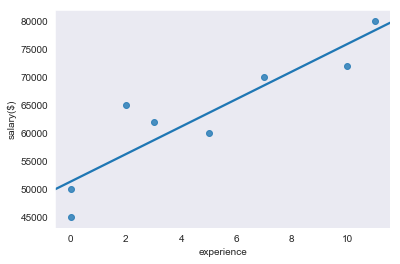

In [19]:
sns.regplot('experience','salary($)',data = data,ci=None)